In [1]:
import pandas as pd
from wakeful import log_munger

In [2]:
%pwd

'/Users/rob/Google_Drive/Datascience/Galvanize/Project/wakeful_proj'

In [3]:
norm_path = './data/home/2018-01-01'

In [4]:
dns_norm_df = log_munger.bro_logs_to_df(norm_path, 'dns');

Successfully monitoring ./data/home/2018-01-01/dns.00:00:00-01:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.01:00:00-02:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.02:00:00-03:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.03:00:00-04:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.04:00:00-05:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.05:00:00-06:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.06:00:00-07:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.07:00:00-08:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.08:00:00-09:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.09:00:00-10:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.10:00:00-11:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.11:00:00-12:00:00.log...
Successfully monitoring ./data/home/2018-01-01/dns.12:00:00-13:00:00.log...
Successfully

In [5]:
print(dns_norm_df.shape)

(34789, 23)


In [6]:
dns_norm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34789 entries, 2017-12-31 17:00:01.938273 to 2018-01-01 16:59:37.023038
Data columns (total 23 columns):
AA             34789 non-null bool
RA             34789 non-null bool
RD             34789 non-null bool
TC             34789 non-null bool
TTLs           34789 non-null object
Z              34789 non-null int64
answers        34789 non-null object
id.orig_h      34789 non-null object
id.orig_p      34789 non-null int64
id.resp_h      34789 non-null object
id.resp_p      34789 non-null int64
proto          34789 non-null object
qclass         34789 non-null int64
qclass_name    34789 non-null object
qtype          34789 non-null int64
qtype_name     34789 non-null object
query          34789 non-null object
rcode          34789 non-null int64
rcode_name     34789 non-null object
rejected       34789 non-null bool
rtt            34789 non-null timedelta64[ns]
trans_id       34789 non-null int64
uid            34789 non-null object

In [7]:
conn_norm_df = log_munger.bro_logs_to_df(norm_path, 'conn');

Successfully monitoring ./data/home/2018-01-01/conn.00:00:00-01:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.01:00:00-02:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.02:00:00-03:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.03:00:00-04:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.04:00:00-05:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.05:00:00-06:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.06:00:00-07:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.07:00:00-08:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.08:00:00-09:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.09:00:00-10:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.10:00:00-11:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.11:00:00-12:00:00.log...
Successfully monitoring ./data/home/2018-01-01/conn.12:00:00-13:00:00.log...

In [8]:
conn_norm_df.shape

(58264, 23)

In [9]:
conn_norm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58264 entries, 2017-12-31 16:59:44.996915 to 2018-01-01 16:59:45.264113
Data columns (total 23 columns):
conn_state        58264 non-null object
duration          58264 non-null timedelta64[ns]
history           58264 non-null object
id.orig_h         58264 non-null object
id.orig_p         58264 non-null int64
id.resp_h         58264 non-null object
id.resp_p         58264 non-null int64
local_orig        58264 non-null bool
local_resp        58264 non-null bool
missed_bytes      58264 non-null int64
orig_bytes        58264 non-null int64
orig_cc           58264 non-null object
orig_ip_bytes     58264 non-null int64
orig_pkts         58264 non-null int64
proto             58264 non-null object
resp_bytes        58264 non-null int64
resp_cc           58264 non-null object
resp_ip_bytes     58264 non-null int64
resp_pkts         58264 non-null int64
sensorname        58264 non-null object
service           58264 non-null object
tunnel

In [10]:
dns_norm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34789 entries, 2017-12-31 17:00:01.938273 to 2018-01-01 16:59:37.023038
Data columns (total 23 columns):
AA             34789 non-null bool
RA             34789 non-null bool
RD             34789 non-null bool
TC             34789 non-null bool
TTLs           34789 non-null object
Z              34789 non-null int64
answers        34789 non-null object
id.orig_h      34789 non-null object
id.orig_p      34789 non-null int64
id.resp_h      34789 non-null object
id.resp_p      34789 non-null int64
proto          34789 non-null object
qclass         34789 non-null int64
qclass_name    34789 non-null object
qtype          34789 non-null int64
qtype_name     34789 non-null object
query          34789 non-null object
rcode          34789 non-null int64
rcode_name     34789 non-null object
rejected       34789 non-null bool
rtt            34789 non-null timedelta64[ns]
trans_id       34789 non-null int64
uid            34789 non-null object

In [13]:
dns_norm_df.head(5)

,AA,RA,RD,TC,TTLs,Z,answers,id.orig_h,id.orig_p,id.resp_h,...,qclass_name,qtype,qtype_name,query,rcode,rcode_name,rejected,rtt,trans_id,uid
ts,,,,,,,,,,,,,,,,,,,,,
2017-12-31 17:00:01.938273,False,False,True,False,-,0,-,192.168.1.165,41584,192.168.1.1,...,C_INTERNET,1,A,unifi.lan,3,NXDOMAIN,True,00:00:00,24784,C7tuuA4vfshEl4XAmi
2017-12-31 17:00:01.938873,False,False,True,False,-,0,-,192.168.1.165,41584,192.168.1.1,...,C_INTERNET,1,A,unifi,0,NOERROR,True,00:00:00,46519,C7tuuA4vfshEl4XAmi
2017-12-31 17:00:07.000664,False,True,True,False,"40.000000,40.000000,40.000000,40.000000,40.000...",0,"2620:149:a42:206::4,2620:149:a42:206::6,2620:1...",192.168.1.173,51497,192.168.1.1,...,C_INTERNET,28,AAAA,p48-keyvalueservice.fe.apple-dns.net,0,NOERROR,False,00:00:00.010995,36738,CmRhG43n8e46gH8A9
2017-12-31 17:00:07.000665,False,True,True,False,"54.000000,54.000000,54.000000,54.000000,54.000...",0,"17.248.131.179,17.248.131.176,17.248.131.144,1...",192.168.1.173,62477,192.168.1.1,...,C_INTERNET,1,A,p48-keyvalueservice.fe.apple-dns.net,0,NOERROR,False,00:00:00.015727,8402,CQ6wSU3xOCCuBoCwBf
2017-12-31 17:00:07.077026,False,True,True,False,"282.000000,282.000000,282.000000,282.000000,28...",0,"2400:cb00:2048:1::6810:d607,2400:cb00:2048:1::...",192.168.1.173,58408,192.168.1.1,...,C_INTERNET,28,AAAA,airspace-cdn.acmeaom.com.cdn.cloudflare.net,0,NOERROR,False,00:00:00.010744,59043,CLdc8w34adXxSum3Y1


In [14]:
conn_norm_df.head(5)

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,...,orig_pkts,proto,resp_bytes,resp_cc,resp_ip_bytes,resp_pkts,sensorname,service,tunnel_parents,uid
ts,,,,,,,,,,,,,,,,,,,,,
2017-12-31 16:59:44.996915,SF,00:00:00.021379,Dd,192.168.1.241,33706,8.8.8.8,53,True,False,0,...,1,udp,95,US,123,1,forest-eth1,dns,(empty),CgOt4X2CToxwaqJ72h
2017-12-31 16:59:45.018768,SF,00:00:00.021652,Dd,192.168.1.241,58086,8.8.8.8,53,True,False,0,...,1,udp,99,US,127,1,forest-eth1,dns,(empty),CPrRd81NmpwZ8wuIq6
2017-12-31 16:59:01.286540,S0,00:00:00,D,192.168.1.165,39260,255.255.255.255,10001,True,False,0,...,1,udp,0,-,0,0,forest-eth1,-,(empty),CQ6hEf2S1VADKKHDl2
2017-12-31 17:00:01.841136,SF,00:00:00.039987,ShADadFf,192.168.1.240,56050,192.168.1.241,4506,True,True,0,...,9,tcp,1398,-,1770,7,forest-eth1,-,(empty),CVyhnT397Wd2ptB4Vi
2017-12-31 16:59:07.014457,S0,00:00:00.995528,D,192.168.1.222,1900,192.168.1.241,43112,True,True,0,...,2,udp,0,-,0,0,forest-eth1,-,(empty),Cwzx6W3Kgs4tTEfQR5


In [15]:
norm_df = pd.merge(dns_norm_df, conn_norm_df, on='uid')

In [16]:
norm_df.shape

(34789, 45)

In [17]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34789 entries, 0 to 34788
Data columns (total 45 columns):
AA                34789 non-null bool
RA                34789 non-null bool
RD                34789 non-null bool
TC                34789 non-null bool
TTLs              34789 non-null object
Z                 34789 non-null int64
answers           34789 non-null object
id.orig_h_x       34789 non-null object
id.orig_p_x       34789 non-null int64
id.resp_h_x       34789 non-null object
id.resp_p_x       34789 non-null int64
proto_x           34789 non-null object
qclass            34789 non-null int64
qclass_name       34789 non-null object
qtype             34789 non-null int64
qtype_name        34789 non-null object
query             34789 non-null object
rcode             34789 non-null int64
rcode_name        34789 non-null object
rejected          34789 non-null bool
rtt               34789 non-null timedelta64[ns]
trans_id          34789 non-null int64
uid               3

In [18]:
norm_df['pcr'] = (norm_df.orig_bytes - norm_df.resp_bytes) / (norm_df.orig_bytes + norm_df.resp_bytes) 

In [19]:
norm_df.to_hdf('./data/home/dns_and_conn_20180101.h5', 'test', complevel=9, complib='zlib')

In [20]:
!ls -lh ./data/home/*.h5

-rw-r--r--  1 rob  staff   9.3M Jan 15 11:08 ./data/home/dns_and_conn_20180101.h5


In [21]:
key = 'key_to_finding_data'
log_munger.df_to_hdf5(norm_df, key, './data/home/')

In [22]:
data_dir = './data/home'
df = log_munger.hdf5_to_df(data_dir, key)

In [23]:
df.shape == norm_df.shape

True

In [24]:
df.equals(norm_df)

True

In [25]:
norm_df['label'] = 0

In [26]:
norm_df.columns

Index(['AA', 'RA', 'RD', 'TC', 'TTLs', 'Z', 'answers', 'id.orig_h_x',
       'id.orig_p_x', 'id.resp_h_x', 'id.resp_p_x', 'proto_x', 'qclass',
       'qclass_name', 'qtype', 'qtype_name', 'query', 'rcode', 'rcode_name',
       'rejected', 'rtt', 'trans_id', 'uid', 'conn_state', 'duration',
       'history', 'id.orig_h_y', 'id.orig_p_y', 'id.resp_h_y', 'id.resp_p_y',
       'local_orig', 'local_resp', 'missed_bytes', 'orig_bytes', 'orig_cc',
       'orig_ip_bytes', 'orig_pkts', 'proto_y', 'resp_bytes', 'resp_cc',
       'resp_ip_bytes', 'resp_pkts', 'sensorname', 'service', 'tunnel_parents',
       'pcr', 'label'],
      dtype='object')

In [27]:
mal_dns_df = log_munger.bro_logs_to_df('./data/c2', 'dns')
mal_conn_df = log_munger.bro_logs_to_df('./data/c2', 'conn')

Successfully monitoring ./data/c2/dnscat2/dns.log...
Successfully monitoring ./data/c2/iodine-forwarded/dns.log...
Successfully monitoring ./data/c2/iodine-raw/dns.log...
Successfully monitoring ./data/c2/dnscat2/conn.log...
Successfully monitoring ./data/c2/icmptunnel/conn.log...
Successfully monitoring ./data/c2/iodine-forwarded/conn.log...
Successfully monitoring ./data/c2/iodine-raw/conn.log...
Successfully monitoring ./data/c2/ptunnel/conn.log...


In [28]:
mal_df = pd.merge(mal_dns_df, mal_conn_df, on='uid')

In [29]:
mal_df['label'] = 1

In [30]:
mal_dns_df.shape, mal_conn_df.shape, mal_df.shape

((3445, 22), (3459, 20), (3445, 42))

In [31]:
log_munger.generate_pcr_feature(mal_df)

In [32]:
mal_df.shape

(3445, 43)

In [33]:
df = pd.append?

Object `pd.append` not found.


In [ ]:
df = pd.append

In [34]:
df = norm_df.append(mal_df)

In [35]:
df.shape, norm_df.shape, mal_df.shape

((38234, 47), (34789, 47), (3445, 43))

In [36]:
m = set(mal_df.columns)
n = set(norm_df.columns)

In [37]:
inconsistent_columns = {r for r in n if r not in m}

In [38]:
df = df.drop(inconsistent_columns, axis=1)

In [39]:
df.shape

(38234, 43)

In [40]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=37, test_size=0.5)
train.shape, test.shape

((19117, 43), (19117, 43))

In [41]:
train_majority = train[train.label==0]
train_minority = train[train.label==1]
train_deficit = len(train_majority) - len(train_minority)
train_majority.shape, train_minority.shape, train_deficit

((17409, 43), (1708, 43), 15701)

In [42]:
from sklearn.utils import resample
train_minority_resampled = resample(train_minority,
                                replace=True,
                                random_state=37,
                                n_samples=len(train_majority))

In [43]:
train_minority.shape, train_minority_resampled.shape

((1708, 43), (17409, 43))

In [44]:
train_resampled = train_majority.append(train_minority_resampled)
train_resampled.shape

(34818, 43)

In [45]:
X_train = train_resampled.copy(deep=True)

In [46]:
y_train = X_train.pop('label')
y_train.shape, X_train.shape

((34818,), (34818, 42))

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
corr = X_train.corr()

In [49]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

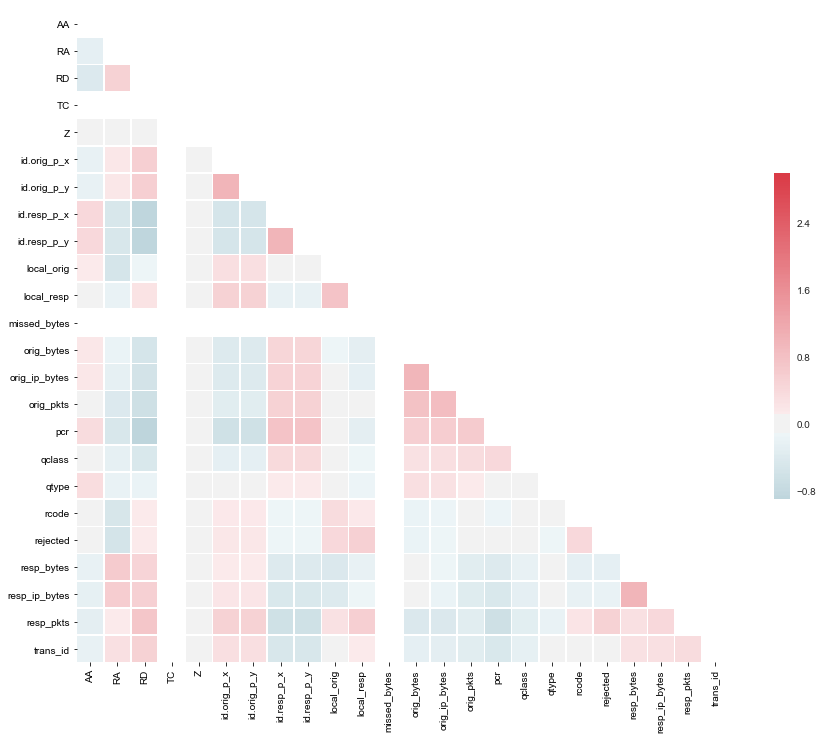

In [50]:
f, ax = plt.subplots(figsize=(16, 12))
sns.set(style='white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, 
            center=0, square=True, linewidths=.5, 
            cbar_kws={'shrink': .5})

### Clustering

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

### SVD and Logistic Regression

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import linear_model

In [77]:
scaler = StandardScaler()
svd = decomposition.TruncatedSVD(n_components=15, random_state=37, n_iter=10)
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA(n_components=10, random_state=37)

pipeline = Pipeline(steps=[('scaler', scaler), ('pca', pca)])  #, ('svd', svd), ('logistic', logistic)


In [78]:
numerics = X_train.copy(deep=True)
numerics = numerics.drop(['TTLs', 'answers', 'conn_state', 'history', 'id.orig_h_x', 
                          'id.orig_h_y', 'id.resp_h_x', 'id.resp_h_y', 'proto_x', 'proto_y',
                          'qclass_name', 'qtype_name', 'query', 'rcode_name', 'service', 'tunnel_parents',
                          'uid'], axis=1)

In [79]:
# Convert timedeltas to seconds
numerics = numerics.drop(['duration'], axis=1)

In [93]:
x_temp = numerics.values
type(numerics), type(x_temp), x_temp.shape

(pandas.core.frame.DataFrame, numpy.ndarray, (34818, 24))

In [100]:
numerics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34818 entries, 13831 to 2859
Data columns (total 24 columns):
AA               34818 non-null bool
RA               34818 non-null bool
RD               34818 non-null bool
TC               34818 non-null bool
Z                34818 non-null int64
id.orig_p_x      34818 non-null int64
id.orig_p_y      34818 non-null int64
id.resp_p_x      34818 non-null int64
id.resp_p_y      34818 non-null int64
local_orig       34818 non-null bool
local_resp       34818 non-null bool
missed_bytes     34818 non-null int64
orig_bytes       34818 non-null int64
orig_ip_bytes    34818 non-null int64
orig_pkts        34818 non-null int64
pcr              34331 non-null float64
qclass           34818 non-null int64
qtype            34818 non-null int64
rcode            34818 non-null int64
rejected         34818 non-null bool
resp_bytes       34818 non-null int64
resp_ip_bytes    34818 non-null int64
resp_pkts        34818 non-null int64
trans_id         34

In [94]:
# get the data
X_digits = numerics.values
y_digits = y_train.values

In [102]:
type(X_digits)

numpy.ndarray

In [106]:
X_digits[1:5, :].T

array([[False, False, False, False],
       [False, False, False, True],
       [True, False, True, True],
       [False, False, False, False],
       [0, 0, 0, 0],
       [50502, 5353, 55181, 32931],
       [50502, 5353, 55181, 32931],
       [53, 5353, 53, 53],
       [53, 5353, 53, 53],
       [True, True, True, True],
       [False, False, True, True],
       [0, 0, 0, 0],
       [24, 1968, 51, 33],
       [52, 2360, 79, 61],
       [1, 14, 1, 1],
       [-0.6097560975609756, 1.0, 0.0, -0.1951219512195122],
       [1, 1, 1, 1],
       [28, 12, 28, 1],
       [3, 0, 0, 0],
       [False, False, True, False],
       [99, 0, 51, 49],
       [127, 0, 79, 77],
       [1, 0, 1, 1],
       [22175, 0, 31928, 40499]], dtype=object)

In [109]:
row = X_digits[0, :]
print(row)
for i in range(X_digits.shape[1]):
    print(type(X_digits[:, i]))

[False False True False 0 41584 41584 53 53 True True 0 50 106 2 0.0 1 1 3
 True 50 106 2 25810]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [103]:
indx = np.where(np.isnan(X_digits))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [81]:

# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(svd.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(svd__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['svd'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').